# UCL AI Society Machine Learning Tutorials
### Session 01. Introduction to Numpy, Pandas and Matplotlib Libraries

### Contents
1. Numpy
2. Pandas
3. Matplotlib
4. EDA

### Aim
At the end of this session, you will be able to:
- Understand the basics of numpy.
- Understand the basics of pandas.
- Understand the basics of matplotlib.
- Perform a simple EDA (Exploratory Data Analysis) using the libraries above.

## 4. EDA (Exploratory Data Analysis)
To build and train machine learning models more efficiently, Exploratory Data Analysis, or EDA for short, should precede building the training model. This statistical approach was introduced by Professor John Tukey, also widely known for developing fast Fourier transform (FFT). 
The main goal of EDA is to analyze the data sets in order to understand their main characteristics, often with visualizations, summary tables and statistics. A thing to note is that visualization should be differentiated from EDA, as the former is mainly for the final stages of analysis and communication of results, while the latter is conducted at the beginning of the task.

Remember the quote, "Garbage In, Garbge Out!".

The **basic order of EDA** theoretically is:
   1. Find questions about the data set.
   2. Find the answer to them on the data set using visualization, transformation and modelling.
   3. Go deeper into the questions through the answers and find new questions.
   4. Repeat tasks 1-3 iteratively until satisfied.

### 4.1 Import Data and Libraries
The dataset we will use can be downloaded here: https://www.kaggle.com/c/nyc-taxi-trip-duration/data . Once you download your files, make sure to rename them to `nyc-taxi-train.csv` and `nyc-taxi-test.csv`.

The dataset is provided by Google Cloud Platform and is based on the 2016 NYC Yellow Cab trip record. Kaggle datasets are normally well-preprocessed, so practicing EDA with a Kaggle dataset can be a good start for beginners.

The libraries that we covered so far (Numpy, Pandas, and Matplotlib) are your main tools for EDA. Additonally, `seaborn` is another famous library, used mainly for visualization.

#### Because the size of the data is huge, we could not upload it to github. Please download the data from the link above and place it in your 'data' directory.

In [ ]:
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Since it takes very long time to load the original dataset
train = pd.read_csv("./data/nyc-taxi-train.csv")

In [4]:
# Let's see what the data is comprised of.
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
test = pd.read_csv("./data/nyc-taxi-test.csv")

In [6]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


### 4.2 Check the Characteristics
- `info()` : Gives brief information
- `shape` : Returns data shape, (rows, columns)
- `dtypes` : Returns data types of each columns
- `describe()` : Returns the data statistics
- `keys()` : Returns the the keys of columns

In [7]:
# To Do: Brief Information of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
# To Do: Return shape of our data
train.shape

(1458644, 11)

In [9]:
# To Do: Return data types of each field (column name)
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [10]:
# To Do: Return the data statistics
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### 4.3 Check the Values
Checking for null values, anamolies and outliers in a dataset is an essential step in EDA before you actually apply ML on it.

As this dataset is well-preprocess, you won't see any null values. However, do find out and learn how to deal with missing values or null values. We have discussed this in our pandas session. It is very normal to have corrupt data in the real world.

In [12]:
# To Do: Return the keys of the columns
train.keys()

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [21]:
train.isnull().sum()   # Remember this trick? - from the pandas session

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
distance              0
dtype: int64

In [22]:
# minimum and maximum longitude in trainset
min(train.pickup_longitude.min(), train.dropoff_longitude.min()), \
max(train.pickup_longitude.max(), train.dropoff_longitude.max())

(-121.93334197998048, -61.33552932739258)

In [23]:
# minimum and maximum latitude in trainset
min(train.pickup_latitude.min(), train.dropoff_latitude.min()), \
max(train.pickup_latitude.max(), train.dropoff_latitude.max())

(32.1811408996582, 51.88108444213867)

In [24]:
# minimum and maximum longitude test set
min(test.pickup_longitude.min(), test.dropoff_longitude.min()), \
max(test.pickup_longitude.max(), test.dropoff_longitude.max())

(-121.9333267211914, -67.49679565429689)

In [25]:
# minimum and maximum latitude test
min(test.pickup_latitude.min(), test.dropoff_latitude.min()), \
max(test.pickup_latitude.max(), test.dropoff_latitude.max())

(36.601322174072266, 48.85759735107422)

They are very similar, as we expected. Next, run the code below and get a histogram of all the pickup latitudes in the training set. The plot should set its bounds to the biggest and smallest value in that dataset. Are you surprised by what you see? What can you do to get a more informative representation of this data?

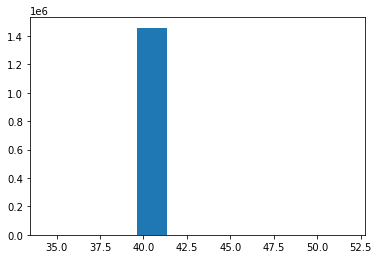

In [26]:
plt.hist(train['pickup_latitude'])
plt.show()

### Solution

If we increase the number of bins and plot in a log-scale for the y-axis, we start to observe that there are outliers (the small bump above 37.5).

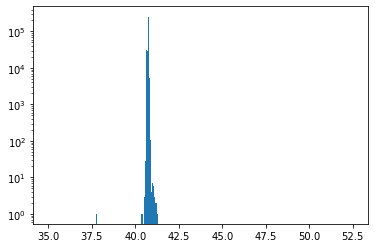

In [36]:
plt.hist(train['pickup_latitude'], bins=np.arange(35, 52.5, 0.01))
plt.yscale('log')
plt.show()

We can also focus in on regions of interest

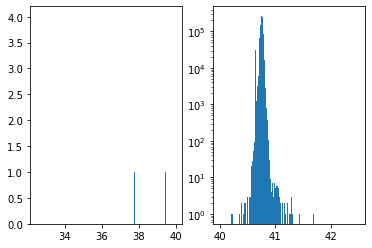

In [45]:
fig, axs = plt.subplots(1, 2)

axs[0].hist(train['pickup_latitude'], bins=np.arange(32.5, 40, 0.01))
axs[1].hist(train['pickup_latitude'], bins=np.arange(40, 42.5, 0.01))
plt.yscale('log')
plt.show()

This gives us further understanding of the data, allowing us to decide how to handle the outliers.

### 4.4 EDA Exercise (optional)

Below, assign to X the first 100 trips that have `trip_duration<10000` and to Y - the first 100 trips that have `trip_duration>10000`. Run your code and observe the histogram. What conjecture can you make based on this data?

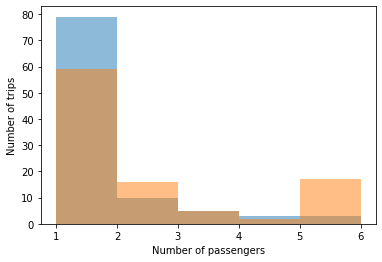

In [17]:
# Put your code here
X = train[train['trip_duration']<10000][:100]
Y = train[train['trip_duration']>10000][:100]

# This will visualise the data you selected
bins = [1, 2, 3, 4, 5, 6]
plt.hist(X['passenger_count'], bins, alpha=0.5)
plt.hist(Y['passenger_count'], bins, alpha=0.5)
plt.xlabel("Number of passengers")
plt.ylabel("Number of trips")
plt.show()

### 4.5 Making Derivative Attributes

ML models digest only what we feed them. You cannot expect an ML model to know that the distance from the pickup spot to the dropoff spot is important. You have to make a new attribute for the distance and feed that into your model if you want it to take this into consideration.

In general, if you come up with a new informative attribute that can possibly boost the model performance, consider adding it to your model.

In [18]:
# calculate the trip distance in miles
# based on https://stackoverflow.com/questions/27928/
# Returns distance in miles
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

In [19]:
train['distance'] = distance(train.pickup_latitude, 
                             train.pickup_longitude, 
                             train.dropoff_latitude, 
                             train.dropoff_longitude)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  distance            1458644 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 133.5+ MB


This is just the start of EDA. As mentioned above, having full insight on the data will help you build a stronger machine learning model. Find more materials and implement EDA yourself.

### What do I do next?

## MAKE YOUR OWN WONDERFUL EDA!

### Challenge: Try to make a map using the logitude and latitude data from the taxicab data set above. Treating the logitude as X and the latitude as Y, draw a scatter plot and that should give you a good-looking map.

The below websites should be helpful for your further study of EDA:
- [Exploratory data analysis on Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)
- [What is Exploratory Data Analysis?](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- [Introduction to Exploratory Data Analysis in Python](https://medium.com/python-pandemonium/introduction-to-exploratory-data-analysis-in-python-8b6bcb55c190)
- [Kaggle: New York City Taxi trip duration notebooks](https://www.kaggle.com/c/nyc-taxi-trip-duration/notebooks)
